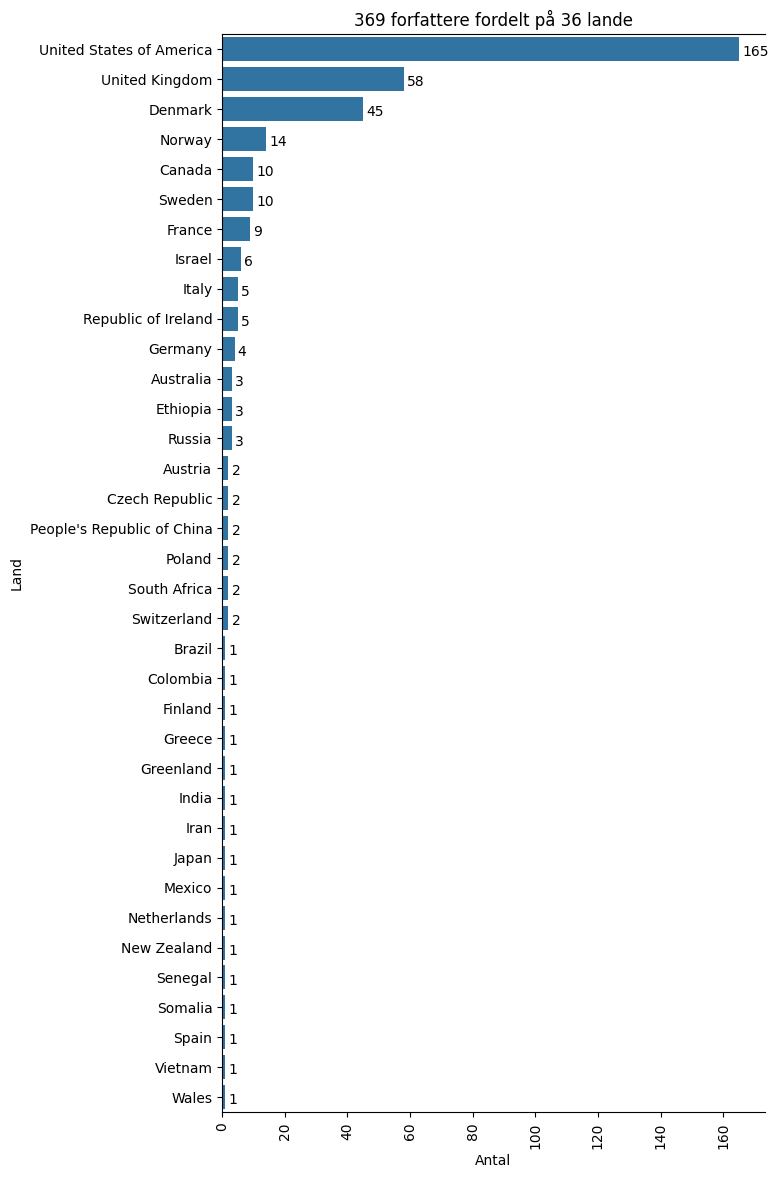

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ast

df = pd.read_csv('../data/outputs/05_final_data.csv', index_col=0)
df['Countries'] = df['Countries'].apply(ast.literal_eval)
df['Books'] = df['Books'].apply(ast.literal_eval)

# Aggregate the data
country_count = defaultdict(int)
for countries in df['Countries']:
    # just take the first country
    for country in countries:
        country_count[country] += 1
        break # only take the first country, the second is usually US


# Convert to DataFrame for plotting
country_df = pd.DataFrame(list(country_count.items()), columns=['Country', 'Count']).sort_values(by=['Count','Country'], ascending=[False, True])
author_count = len(df['Author'].unique())
# Bar Chart
plt.figure(figsize=(7, 14))
sns.barplot(x='Count', y='Country', data=country_df)
plt.title(f"{author_count} forfattere fordelt på {len(country_count.keys())} lande")
plt.xlabel('Antal')
plt.ylabel('Land')

# add count labels
for i, v in enumerate(country_df['Count']):
    plt.text(v + 1, i + .23, str(v), color='black')

# remove border
sns.despine(left=False, bottom=False, right=True, top=False)

plt.xticks(rotation=90)
plt.show()


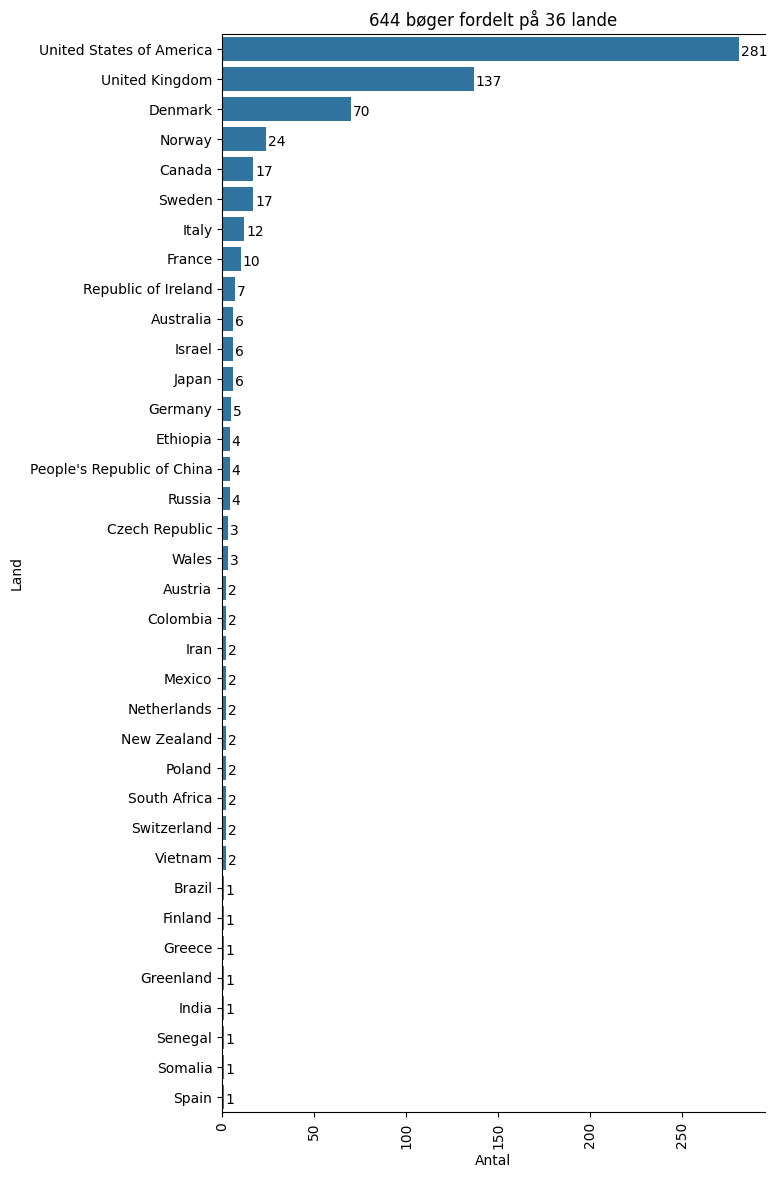

In [49]:
# count the books per country
books_count = defaultdict(int)

for index, row in df.iterrows():
    for country in row['Countries']:
        books_count[country] += row['Book Count']
        break # only take the first country, the second is usually US

books_per_country_df = pd.DataFrame(list(books_count.items()), columns=['Country', 'Count']).sort_values(by=['Count','Country'], ascending=[False, True])

total_books = books_per_country_df['Count'].sum()
total_countries = len(books_count.keys())
# Bar Chart
plt.figure(figsize=(7, 14))
sns.barplot(x='Count', y='Country', data=books_per_country_df)
plt.title(f"{total_books} bøger fordelt på {total_countries} lande")
plt.xlabel('Antal')
plt.ylabel('Land')

# add count labels
for i, v in enumerate(books_per_country_df['Count']):
    plt.text(v + 1, i + .23, str(v), color='black')

# remove border
sns.despine(left=False, bottom=False, right=True, top=False)

plt.xticks(rotation=90)
plt.show()
